# P-values

_Valerio Ippolito - INFN Sezione di Roma_

This is the part in which we run the p-value calculation.

## Local p-values

Let's first make sure CommonStatTools is compiled

In [1]:
!cd ../CommonStatTools; mkdir -p build; cd build; cmake ..; make

-- Configuring done


-- Generating done


-- Build files have been written to: /eos/home-v/vippolit/SWAN_projects/ATLAS_statistics_tutorial/statistics-tutorial/CommonStatTools/build


Scanning dependencies of target CommonStatTools


Consolidate compiler generated dependencies of target CommonStatTools


[ 50%] Built target CommonStatTools


Consolidate compiler generated dependencies of target runSig


[ 60%] Built target runSig


Consolidate compiler generated dependencies of target getGlobalP0


[ 70%] Built target getGlobalP0


Consolidate compiler generated dependencies of target exampleSignificance


[ 80%] Built target exampleSignificance


Consolidate compiler generated dependencies of target getCorrMatrix


[ 90%] Built target getCorrMatrix


Consolidate compiler generated dependencies of target runAsymptoticsCLs


[100%] Built target runAsymptoticsCLs




We then load the compiled library, and the headers for the class which deals with the p-value calculation

In [2]:
#include "../CommonStatTools/SignificanceCalculator.h"

In [3]:
R__ADD_LIBRARY_PATH(../CommonStatTools/build)

In [4]:
R__LOAD_LIBRARY(libCommonStatTools.so)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



P-values are run on a given workspace, contained in some input file. The workspace is expected to contain the ModelConfig, which specifies how the content of the workspace should be used to perform a statistical analysis. P-values are run considering some dataset as data.

In [5]:
inputFile = TString("../create_data/ws/ATLASIT_prova_combined_ATLASIT_prova_model.root");
workspaceName = TString("combined"); 
modelConfigName = TString("ModelConfig"); 
dataName = TString("obsData"); 

Let's retrieve them

In [6]:
input_f = new TFile(inputFile);
w = dynamic_cast<RooWorkspace*>(input_f->Get(workspaceName));
mc = dynamic_cast<RooStats::ModelConfig*>(w->obj(modelConfigName));
dataset = dynamic_cast<RooDataSet*>(w->data(dataName));

We will use the simple class `SignificanceCalculator` - who is the guy who will actually run significance calculation for us.

In [7]:
CommonStatTools::SignificanceCalculator calculator;
calculator.SetCPU(1);
calculator.CalculateSignificance(mc, dataset);

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooProdPdf::getConstraints(model_ljets_HThad_5j3b) omitting term lumiConstraint as constraint term as it does not share any parameters with the other pdfs in product. To force inclusion in likelihood, add an explicit Constrain() argument for the target parameter
[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_simPdf_FOR_OBS_channelCat:obs_x_ljets_HThad_5j3b:obs_x_ljets_Mbb_ge6jge4b with 4 entries
[#1] INFO:Minization --  Including the following constraint terms in minimization: (alpha_lumiConstraint,alpha_ttXsecConstraint,alpha_JES_Scenario1_NP1Constraint,alpha_stXsecConstraint)
[#1] INFO:Minization -- The following global observables have been defined: (nom_alpha_lumi,nom_alpha_ttXsec,nom_alpha_JES_Scenario1_NP1,nom_alpha_stXsec)
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state ljets_HThad_5j3b (5 d

The p-value calculation is very simple: it's given by (https://arxiv.org/pdf/1007.1727.pdf)
$$q_0 = 2(NLL_0 - NLL)$$
there $NLL_0$ is the negative log-likelihood calculated when the POI is set to zero (background-only hypothesis), and $NLL$ is the value when also the POI is free to float.

In [8]:
std::cout << "Significance is: " << calculator.GetSignificance()
          << ", p-value is: " << calculator.GetPvalue() << "\n";

Significance is: 1.2316, p-value is: 0.109049


Toys which repeat the calculation over many variations of the global observables may be used as a way to check how likely is it to have a fluctuation higher than the observed one (as in the concept of _global p-value_), and can be run easily:

In [9]:
N_toys = 1000;

calculator.SetSeed(1337); // useful to run in batch and be sure to merge many independent outputs!
calculator.SetPrintoutFrequency(10); // -1 will disable the printout
calculator.CalculateSignificanceToys(w, mc, dataset, N_toys);

pValues = calculator.GetToysPvalues();
significances = calculator.GetToysSignificances();

[#1] INFO:NumericIntegration -- RooRealIntegral::init(ljets_HThad_5j3b_model_Int[obs_x_ljets_HThad_5j3b]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_ljets_HThad_5j3b)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(ljets_Mbb_ge6jge4b_model_Int[obs_x_ljets_Mbb_ge6jge4b]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_ljets_Mbb_ge6jge4b)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(ljets_HThad_5j3b_model_Int[obs_x_ljets_HThad_5j3b]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_ljets_HThad_5j3b)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(ljets_Mbb_ge6jge4b_model_Int[obs_x_ljets_Mbb_ge6jge4b]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_ljets_Mbb_ge6jge4b)
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooProdPdf::getConstraints(model_ljets_HThad_5j3b) omitting term lumiConstraint as constraint term as 

Let's visualize the output

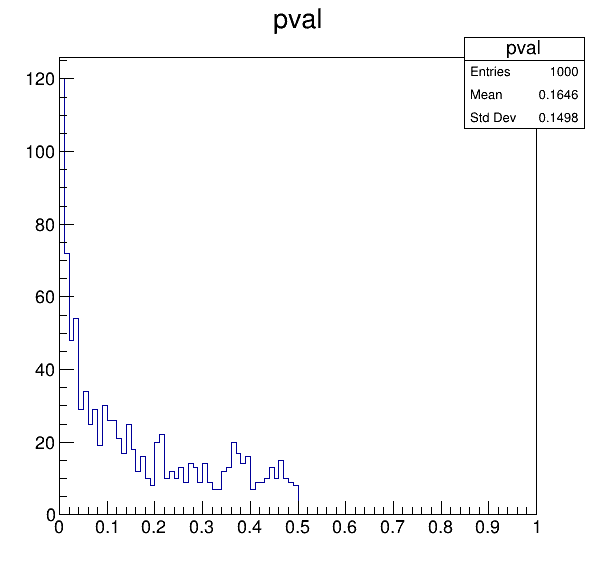

toy 0: pval 0.219067 sign 0.775347
toy 1: pval 0.0306 sign 1.87205
toy 2: pval 0.210265 sign 0.805501
toy 3: pval 0.0161431 sign 2.14085
toy 4: pval 0.490774 sign 0.0231279
toy 5: pval 0.0886402 sign 1.34918
toy 6: pval 0.316373 sign 0.477867
toy 7: pval 0.0383882 sign 1.7697
toy 8: pval 0.281015 sign 0.57983
toy 9: pval 0.122146 sign 1.16432
toy 10: pval 0.018247 sign 2.09138
toy 11: pval 0.190432 sign 0.876305
toy 12: pval 0.101975 sign 1.27038
toy 13: pval 0.0555951 sign 1.59287
toy 14: pval 0.298449 sign 0.528867
toy 15: pval 0.0794852 sign 1.40854
toy 16: pval 0.379165 sign 0.307675
toy 17: pval 0.0019943 sign 2.87906
toy 18: pval 0.0606262 sign 1.54954
toy 19: pval 0.312222 sign 0.489561
toy 20: pval 0.259349 sign 0.645353
toy 21: pval 0.119913 sign 1.17542
toy 22: pval 0.0419843 sign 1.72811
toy 23: pval 0.210858 sign 0.803446
toy 24: pval 0.0361318 sign 1.79745
toy 25: pval 0.0178982 sign 2.09923
toy 26: pval 0.0557582 sign 1.59141
toy 27: pval 0.0360805 sign 1.7981
toy 28: pva

In [10]:
h_pval = new TH1F("pval", "pval", 100, 0, 1);
for (int i = 0; i < pValues.size(); i++) {
    cout << "toy " << i << ": pval " << pValues[i] << " sign " << significances[i] << endl;
    h_pval->Fill(pValues[i]);
}

c = new TCanvas("c", "c", 600, 600);
h_pval->Draw();
c->Draw();

The output may also be persisted to ROOT file:

In [11]:
output_f = new TFile("my_pvalues.root", "RECREATE");
calculator.WriteResultsToROOTfile(output_f, "p0");
calculator.WriteToysToROOTfile(output_f, "toys");
output_f->Write();
delete output_f;

which is in turn read out easily:

In [12]:
output_f = new TFile("my_pvalues.root");
output_f->ls();

TFile**		my_pvalues.root	
 TFile*		my_pvalues.root	
  KEY: TTree	p0;1	
  KEY: TTree	toys;1	


In [13]:
t = dynamic_cast<TTree*>(output_f->Get("p0"));
t->Show(0);

======> EVENT:0
 significance    = 1.2316
 pValue          = 0.109049
 nll0            = -957.882
 nll             = -958.64


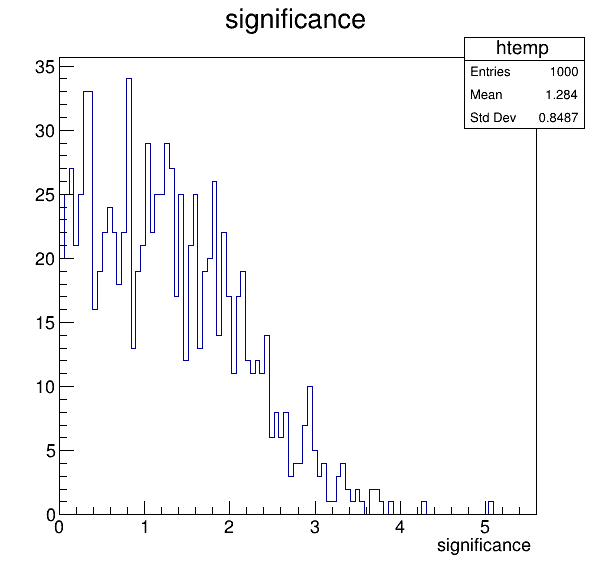

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [19]:
c = new TCanvas("c", "c", 600, 600);
t = dynamic_cast<TTree*>(output_f->Get("toys"));
t->Draw("significance");
c->Draw();

## Global p-values based on crossings

CommonStatTools provides also another basic implementation of the global p-value calculation, based on the crossing method (ATL-PHYS-PUB-2011-011)

You need to provide:
- the maximum local significance, in number of gaussian sigmas
- the number of crossings

In [14]:
!../CommonStatTools/build/getGlobalP0 3.4 2




RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 


                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University


                All rights reserved, please read http://roofit.sourceforge.net/license.txt




 Local p-value :  0.000336929 significance: 3.4
 Global p-value:  0.0105218 significance: 2.3072

